# PA 2: Classification - Nearest Neighbors

## Student Details (2.5 Points)
List names and IDs of students worked on KNN:
 Name : Shubham Bhagwati Sharma
 ID   : 1001964524

## Team Information:

Team ID: 15
Names and IDs of Team members: Lavanya Srinivasan (1002040671)
                               Prem Atul Jethwa (1001861810)


## Note:

1. When submitting, fill above details in this cell. 
2. Do not remove any of these cells. Add your code below.

## Programming Assignment Details (70 Points)

For this assignment use Jupyter notebook, Pandas, and scikit.

* Load dataset_NN.csv dataset. [2 points]
* Data Pre-processing. [10 points]
* Using Pearson's Correlation Coefficient find out the relation between varaibles using Heat Map(Draw heat maps before and after cleaning data to find differences) [5 points]
* Scale the data and mention which scaling technique used [2 point]
* Split your dataset 75% for training, and 25% for testing and do cross validation for the classifier. [2 points]
* Find the best K using elbow method. [5 points]
* Use Euclidean distance.[2 points]
* Select three best attributes and explain why you chose them.[15 points]
* Test the classifier with three different k values for neighbors and record the results.[15 points]
* Plot the ROC curve for best K value.[5 points]
* Use comments to explain your code at each step of all points.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers. **Plot the Error rate vs. K-value**.[15 points]

## Note:

1. Make sure to write about any 4-5 line to explain any kind of visualization
2. Do not to forget to cite any external sources used by you.

## Report (25 Points)

For each classification task you need to submit a report (PDF) that you have to:

* Include a paragraph describing the contribution made by each team member
* Describe the Nearest Neighbors method and why scaling is important in KNN. [5 points]
* Explain what was your criteria for selecting the three attributes. What other 3 attribute can you choose? Visualizations of the target variable w.r.t three most significant attributes in a 2D projection, and write your observations in 4 - 5 lines [5 points]
* Explain Pearson's Correlation Coefficient, write the observations from heatmaps drawn . [5 points]
* Interpret and compare the results.[5 points]
* Do not to forget to cite your sources![5 points]

## Programming Assignment Submission Instructions (2.5 Points)

### Each file should be submitted separately, do not compress them. (For example if you have 3 different files, you have to submit 3 files each one at a time)

For Nearest Neighbor:
1.	'yourLastName_Last4digitsofyourID_NN.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)
2.	Report in PDF (optional)

### <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>

In [71]:
#Getting dependencies.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
#Initializing Dataframe.
dataframe = pd.read_csv("dataset_KNN.csv")

In [73]:
#Checking initialization by loading top 5 rows.
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [74]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [75]:
#Checking count of null values in DataSet.
dataframe.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [76]:
# Finding Correlation values for every attribute with the other.
dataframe.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<Axes: >

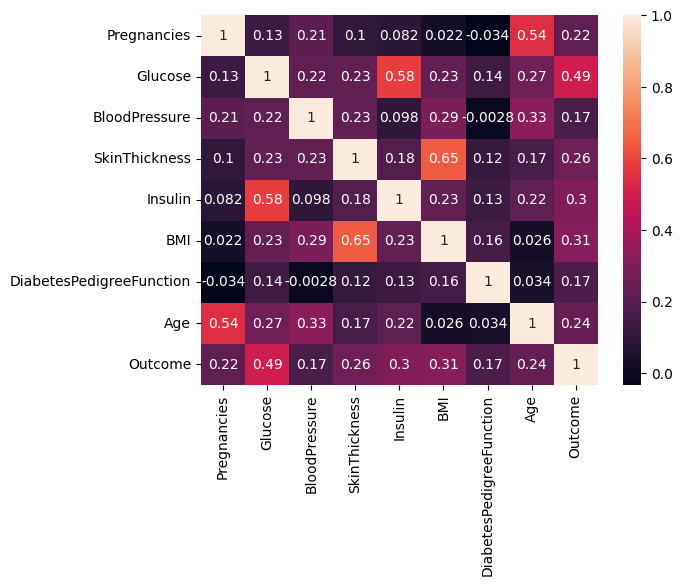

In [77]:
#HeatMap before data cleanup(preprocessing):
sns.heatmap(data = dataframe.corr(), annot=True, cbar = True)

In [78]:
#Performing Data Cleanup for NAN values:
dataframe['Glucose'].fillna(dataframe['Glucose'].mean(), inplace = True)
dataframe['BloodPressure'].fillna(dataframe['BloodPressure'].mean(), inplace = True)
dataframe['SkinThickness'].fillna(dataframe['SkinThickness'].median(), inplace = True)
dataframe['Insulin'].fillna(dataframe['Insulin'].median(), inplace = True)
dataframe['BMI'].fillna(dataframe['BMI'].median(), inplace = True)

In [79]:
#Checking for null values in top 5 rows after cleanup.
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [80]:
#Checking count of null values after cleanup.
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

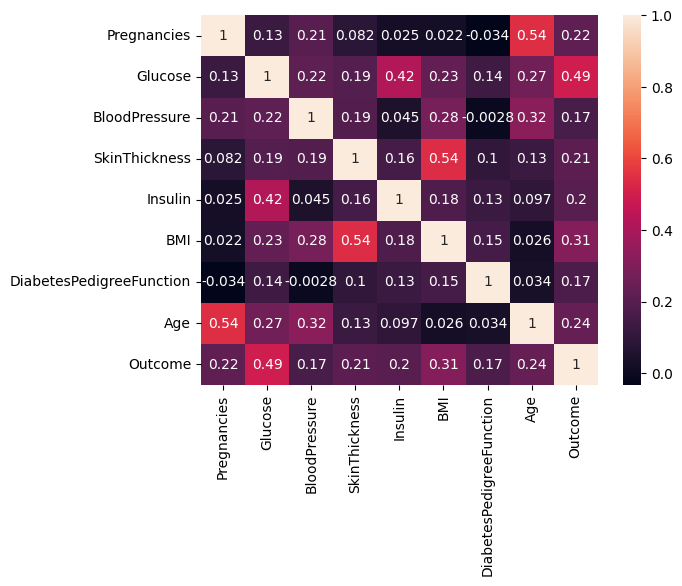

In [81]:
#HeatMap after data cleanup(preprocessing):
sns.heatmap(data = dataframe.corr(), annot=True, cbar = True)

## Since it is evident from the heatmap that the three most correlated predictors with respect to Outcome variable are:
## Glucose(0.49), BMI(0.31), Age(0.24). We chose them as the best attributes.

In [107]:
#Assigning X the best 3 attributes with respect to correlation coeff.
X = dataframe[['Glucose','BMI','Age']]
X.head()

,Glucose,BMI,Age
0,148.0,33.6,50
1,85.0,26.6,31
2,183.0,23.3,32
3,89.0,28.1,21
4,137.0,43.1,33


In [108]:
y = dataframe['Outcome']

In [109]:
# Spliting Data 75-25 for training and testing respectively using train_test_split.
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size = 0.25, stratify=y)

In [110]:
#Scaling Data using Standard Scaling.
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [111]:
#Evaluating error values for scaled dataset to generate best values for K.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
error_val = []
for i in range(1,40):
    knn_class = KNeighborsClassifier(n_neighbors = i, p=2) #For Euclidean distance, set parameter p = 2.
    knn_class.fit(X_train,y_train)
    predic = knn_class.predict(X_test) #Testing the trained model
    f1_scr = f1_score(predic, y_test) # Checking Accuracy by calculating f1 score.
    error_val.append(1-f1_scr)

Text(0, 0.5, 'Error Rate')

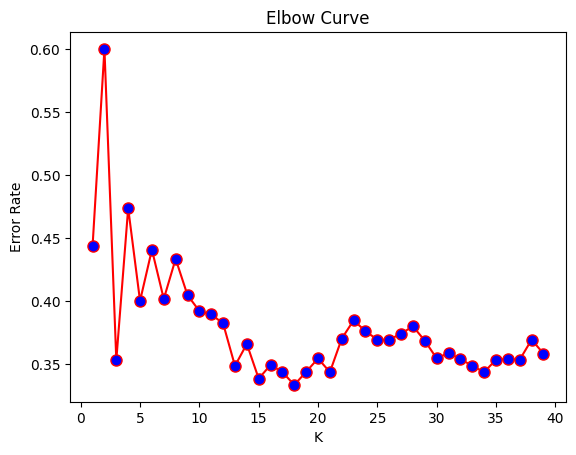

In [112]:
# Plotting Elbow curve for K vs Error rate.
#This will give us a visual representation for values of K that are most accurate according to f1 score generated.
plt.plot(range(1,40),error_val, color = 'red', marker = 'o', markerfacecolor = 'blue', markersize = 8)
plt.title('Elbow Curve')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [113]:
# Finding 3 best values for K where the error is minimum.
print("Min Error:-",min(error_val),"at K =",error_val.index(min(error_val))+1)
error_val[error_val.index(min(error_val))] = 500
print("Min Error:-",min(error_val),"at K =",error_val.index(min(error_val))+1)
error_val[error_val.index(min(error_val))] = 500
print("Min Error:-",min(error_val),"at K =",error_val.index(min(error_val))+1)

Min Error:- 0.33333333333333326 at K = 18
Min Error:- 0.33834586466165406 at K = 15
Min Error:- 0.3435114503816793 at K = 17


In [114]:
# For K = 18(Min error rate)
# Run KNN classifier with K=18 neighbors:

knn_class = KNeighborsClassifier(n_neighbors = 18,p=2)
knn_class.fit(X_train, y_train)
knn_class.score(X_test, y_test)

0.78125

In [115]:
# For K = 15
# Run KNN classifier with K=15 neighbors:

knn_class = KNeighborsClassifier(n_neighbors = 15,p=2)
knn_class.fit(X_train, y_train)
knn_class.score(X_test, y_test)

0.765625

In [116]:
# For K = 17
# Run KNN classifier with K neighbors:

knn_class = KNeighborsClassifier(n_neighbors = 17,p=2)
knn_class.fit(X_train, y_train)
knn_class.score(X_test, y_test)

0.765625

In [117]:
# Retrieving ROC parameter for ROC curve where k=18.
from sklearn.metrics import roc_curve

knn_class = KNeighborsClassifier(n_neighbors = 18,p=2)
knn_class.fit(X_train, y_train)

y_predict_Probablity = knn_class.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict_Probablity)

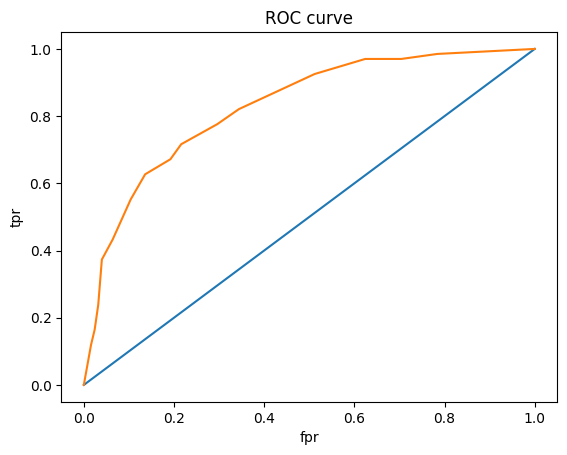

In [118]:
# Plotting the ROC curve.
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [120]:
# For K = 18
# Run KNN classifier with K=18 neighbors:
err = []
knn_class = KNeighborsClassifier(n_neighbors = 18,p=2)
knn_class.fit(X_train, y_train)
prediction = knn_class.predict(X_test)

err.append(1-f1_score(prediction,y_test))

print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))


[[108  17]
 [ 25  42]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       125
           1       0.71      0.63      0.67        67

    accuracy                           0.78       192
   macro avg       0.76      0.75      0.75       192
weighted avg       0.78      0.78      0.78       192



Text(0.5, 23.52222222222222, 'Predicted label')

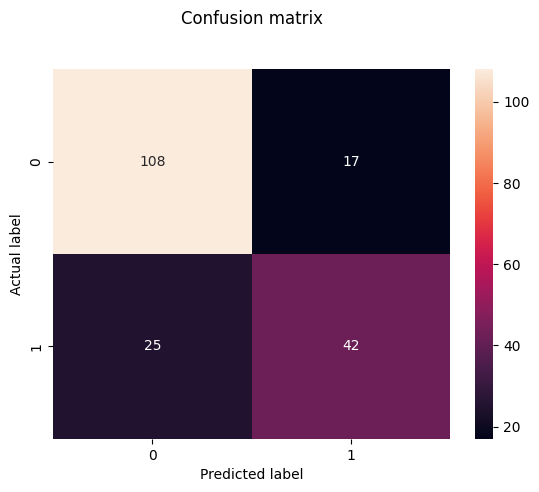

In [122]:
#Generating heatmap for confusion matrix where K=18. The val for true positive is 108 and false positive is 17.
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,prediction)), annot=True, fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


[[103  22]
 [ 23  44]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       125
           1       0.67      0.66      0.66        67

    accuracy                           0.77       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.76      0.77      0.77       192



Text(0.5, 23.52222222222222, 'Predicted label')

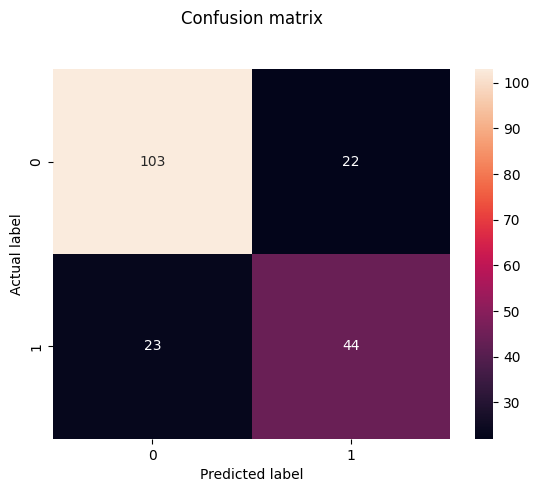

In [123]:
# Run KNN classifier and generate heatmap for confusion matrix with K=15 neighbors:

knn_class = KNeighborsClassifier(n_neighbors = 15,p=2)
knn_class.fit(X_train, y_train)
prediction = knn_class.predict(X_test)

err.append(1-f1_score(prediction,y_test))

print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,prediction)), annot=True, fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


[[104  21]
 [ 24  43]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       125
           1       0.67      0.64      0.66        67

    accuracy                           0.77       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.76      0.77      0.76       192



Text(0.5, 23.52222222222222, 'Predicted label')

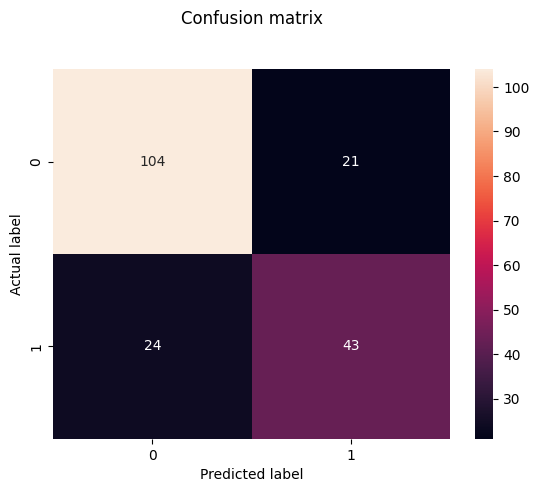

In [124]:
# Run KNN classifier and generate heatmap for confusion matrix with K=17 neighbors:

knn_class = KNeighborsClassifier(n_neighbors = 17,p=2)
knn_class.fit(X_train, y_train)
prediction = knn_class.predict(X_test)

err.append(1-f1_score(prediction,y_test))

print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,prediction)), annot=True, fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Text(0, 0.5, 'K')

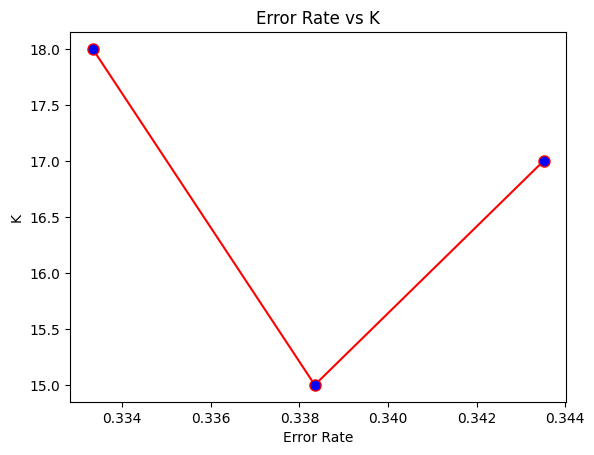

In [133]:
# plotting the Error Rate vs K graph.
k = [18,15,17]

plt.plot(err,k, color = 'red', marker = 'o', markerfacecolor = 'blue', markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('Error Rate')
plt.ylabel('K')

# Report:
## 1) Describe the Nearest Neighbors method and why scaling is important in KNN. [5 points]

## -> The KNN algorithm is a widely used method for dataset classification based on similarity between different data within a dataset. Multiple methods can be implemented to find the distance between two data points but Euclidean distance is the most preferred technique in use. We run the model to determine the best values of K with respect to least error rate. Then, using the 3 best values, we have run the KNN classifier and generated the confusion matrix for further clarity on precision.
## -> Since we are using Euclidean distance to find nearest data points, if the data is not scaled, the attribute that is spread the most and has the largest values will dominate the distance calculation. Hence, in order to avoid such issues, we need to scale the data so that the attributes have equivalent contributions while determing the distance between two data points and finding the nearest neighbors.

## 2) Explain what was your criteria for selecting the three attributes. What other 3 attribute can you choose? Visualizations of the target variable w.r.t three most significant attributes in a 2D projection, and write your observations in 4 - 5 lines [5 points]

## -> Our target variable was 'Outcome' and we plotted the heatmap for correlation of every attribute with the others. We chose the 3 attributes['Glucose','BMI','Age'] with the highest value of correlation on the heatmap for our nearest neighbor classifier as these have the strongest relation with the target variable ['Outcome'].  Following these, we could have chosen the next 3 attributes with highest correlation['Pregnancies','SkinThickness','Insulin']. 

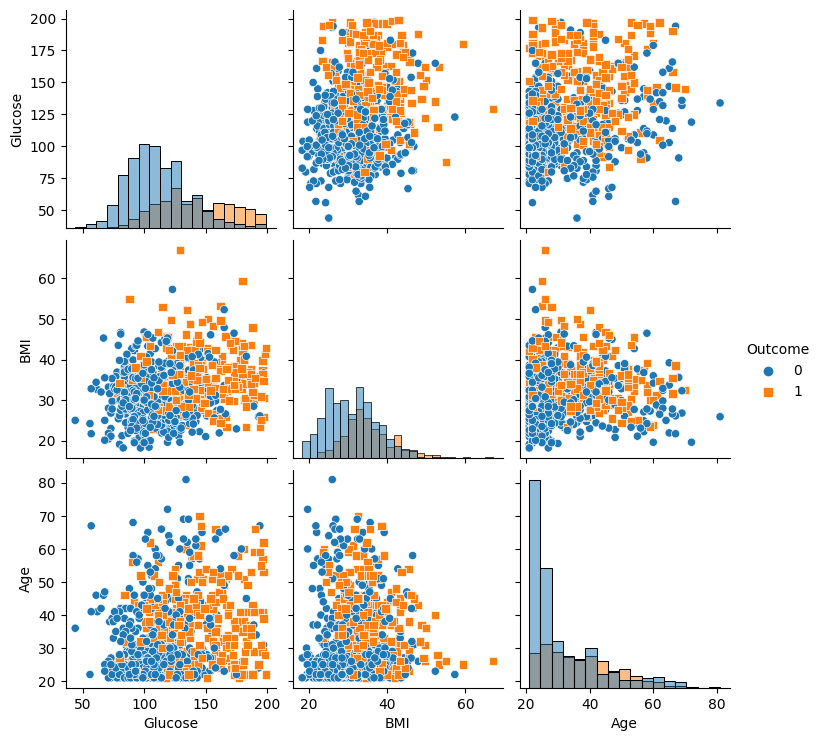

In [132]:
#Visualizations of the target variable w.r.t three most significant attributes in a 2D projection
X = dataframe[['Glucose','BMI','Age']]
y= dataframe['Outcome']

sns.pairplot(data = dataframe , vars = X.columns , hue = 'Outcome' , markers = ["o","s"] , diag_kind = 'hist')
plt.show()

## From the pairplot, it can be observed that there is a positive correlation between the attributes and 'Outcome'. 
## We can also see that there is a higher concentration of positive outcome for higher values of 'BMI' and 'Age', which suggests that these play a significant role in prediction of outcome.
## The scatter plots of 'BMI' vs 'Glucose' and 'Age' vs 'Glucose' also show some separation between the classes, indicating that there may be some interaction or nonlinearity between these attributes in predicting the target variable.

## 3) Explain Pearson's Correlation Coefficient, write the observations from heatmaps drawn . [5 points]

## -> Pearson's Correlation Coefficient is the most commonly used way to measure linear correlation between two attributes. Hence, it describes the strength of dependency the two variables have on one another. Based on this linear relation, the Pearson's technique generates a value for the correlation between -1 and 1. This determines the strength of relation. This is the parameter that we have used to select the 3 best attributes for finding the K nearest neighbors.

## -> The observations drawn from the heatmap for Correlations:
##      We checked the correlation for all attributes using corr() function. Later, we plotted the correlation heatmap for all attributes and found that for the target variable 'Outcome', the three attributes with maximum correlation would be ['Glucose'(0.49),'BMI'(0.31),'Age'(0.24)]. This helped us to determine the selection of best 3 attributes for going ahead with KNN.

## 4) Interpret and compare the results.[5 points]

## -> We have performed the task using Knn3 and found that the lowest value for error rate was calculated to be 0.3333 when the value for K was 18. 
## We performed the same activity and used knn4 and knn5 to determine the error value. On doing the same, we found that the error may vary everytime we perform the activity with a different K value. 
## Apart from that, we also see values fluctuating for other parameters like f1 score, recall and precision. Accuracy is another parameter that changes, when we got 0.78 for knn3, knn4 had an accuracy of 0.75 and knn5 had 0.74. 
## Hence, chosing the value for K where the error rate is minimum, we can get the optimal solution with max Accuracy and f1score.

# References:
## https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
## https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
## https://seaborn.pydata.org/generated/seaborn.heatmap.html
## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
## https://sparkbyexamples.com/pandas/pandas-create-new-dataframe-by-selecting-specific-columns/#:~:text=You%20can%20create%20a%20new,added%20to%20the%20original%20ones.